# Sessie 1 - Introductie

Als een introductiesessie zullen we wat simpele oefeningen maken rond enkele basisstellingen en -begrippen om deze op te frissen en kennis te maken met de notebooks.

Voer de onderstaande code uit om de nodige libraries in te laden.
Je kan natuurlijk op ieder moment zelf libraries importeren om een probleem op te lossen.

In [1]:
%matplotlib inline

import os
import math # native
import matplotlib.pyplot as plt # te installeren
import numpy as np # te installeren
from scipy import misc # te installeren

def plot_errors(n, err):
    plt.plot(n, err)
    plt.xlabel('n')
    plt.ylabel('error')
    plt.show()

C:\Users\jefgr\AppData\Local\Temp\ipykernel_3124\3344802694.py:7: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import misc # te installeren


## 1. Algoritme van Horner

Schrijf een programma die een veelterm
$$p(x) = a_0 + a_1x + a_2x^2 + \cdots + a_nx^n$$
evalueert. Gebruik hiervoor het algoritme van Horner (https://en.wikipedia.org/wiki/Horner%27s_method). Dit is het algoritme die het minst aantal bewerkingen gebruikt (in dit geval $2n$).

In [4]:
def horner(a, x):
    """
    Evalueer een veelterm in punt x. 
    
    Voorbeeld
    ---------
    
    b[0] = a[-1]
    b[1] = a[-2] + b[0]x
    b[2] = a[-3] + b[1]x
    ...
    
    Parameters
    ----------
    a: numpy.array of python list
        Bevat de coefficienten van de veelterm. Opgelet: Deze implementatie vereist dat de coefficienten
        geordend zijn van lage naar hoge order, m.a.w a0, a1, a2, ... , an.
    x: int of float
        Punt waarin de functie geevalueerd moet worden.
    
    Raises
    ------
    None
    
    Returns
    -------
    b: float
        Waarde van veelterm in punt x.
    """
    def iter (index):
        if index < len(a):
            return a[index] + x * (iter(index+1))
        else:
            return 0

    return iter(0)

"""
klasoplossing:

b = a[-1]

for n in range(len(a) -2, -1, -1):
    b = a[n] + b*x

return b

"""

'\nklasoplossing:\n\nb = a[-1]\n\nfor n in range(len(a) -2, -1, -1):\n    b = a[n] + b*x\n\nreturn b\n\n'

In [5]:
### TEST ###
a = np.array([-1, 2, -6, 2])
x = 3
print(horner(a, x)) #should be equal to 5

5


## 2. Taylorexpansie

Maak gebruik van de stelling van Taylor om de functie $e^x$ te benaderen.

In [6]:
def taylor_exp(x, n):
    
    """
    Benader f(x) = e^x tot en met de n-de afgeleide in de Taylorexpansie. Aangezien er geen a meegegeven kan 
    worden als parameter mag u er vanuitgaan dat a = 0. Het gaat hier met andere woorden om een MacLaurin 
    expansie.
    
    Voorbeeld
    ---------
    First order approx.: y = x^0 / 0! + x^1 / 1!
    Second order approx.: y = x^0 / 0! + x^1 / 1! + x^2 / 2!
    ...
    
    Parameters
    ----------
    x: int or float
        Point in which the approximation needs to be evaluated.
    n: int
        Order of the approximation.
    
    Raises
    ------
    None
    
    Returns
    -------
    y: float
        The value corresponding to the approximation evaluated in point x.
    """
    result = 0
    for i in range(n+1):
        result = result + x**i / math.factorial(i)

    return result

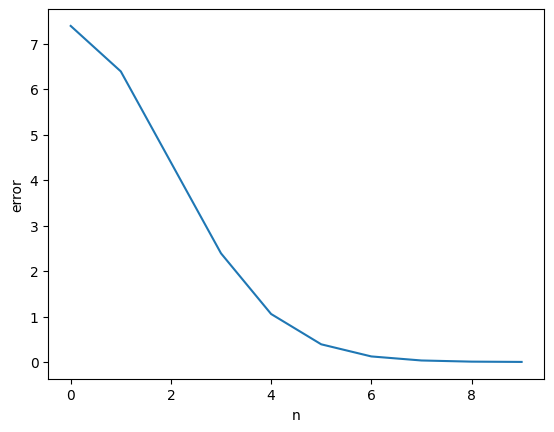

In [9]:
#TEST
x = 2
n = range(10)
errors = [abs(taylor_exp(x, i) - math.exp(x)) for i in n]
plot_errors(n, errors)

## 3. Gram-Schmidt Orthogonalisatie

Gegeven een basis $V \in \mathbb{R}^{n \times n}$ voor een ruimte $\mathbb{R}^n$, implementeer Gram-Schmidt om een orthogonale basis $Q \in \mathbb{R}^{n \times n}$ te vinden voor diezelfde ruimte.

In [14]:
def gram_schmidt(V):
    
    """
    Berekent een orthogonale basis voor dezelfde ruimte gedefinieerd door de basis V. 
    De eerste vector van Q komt overeen met die van V. De nieuwe ruimte wordt iteratief
    opgebouwd. 
    
    Voorbeeld
    ---------
    q[0] = v[0]
    q[1] = v[1] - q'[0]v[1] / q'[0]q[0] * q[0]
    q[2] = v[2] - q'[0]v[2] / q'[0]q[0] * q[0] - q'[1]v[2] / q'[1]q[1] * q[1]
    ...
    
    Parameters
    ----------
    V: list of numpy arrays
        Bevat de oorspronkelijke basis V.
    
    Raises
    ------
    None
    
    Returns
    -------
    Q: list of numpy arrays
        Bevat de nieuwe orthogonale basis Q die dezelfde ruimte definieert als V.
    """
    q = []
    for i in range(len(V)):
        som = V[i]
        for j in range(i):
            som = np.add(som, -(((np.dot(q[j], V[i]))/(np.dot(q[j], q[j]))) * q[j]))
        q.append(som)
    return q

In [33]:
# alternatieve implementatie met python list comprehensions
# list comprehensions zullen in de komende WPOs vaker en vaker gebruikt worden
def gram_schmidt_python_listcomprehension(V):
    """
    Bereken een orthogonale basis voor dezelfde ruimte gedefinieerd door de basis V.
    """
    q = [V[0]]
    for i in range(1, len(V)):
        q.append( np.add(V[i], np.add.reduce([-(((np.dot(q[j], V[i]))/(np.dot(q[j], q[j]))) * q[j]) for j in range(i)])))
    return q

In [34]:
#TEST
V = [np.array([4, -3, -2]),  #v1
     np.array([2,  3,  2]),  #v2
     np.array([5,  7,  8])   #v3
    ]
print('<v[0], v[1]> = ' + str(np.dot(V[0], V[1])))
print('<v[0], v[2]> = ' + str(np.dot(V[0], V[2])))
print('<v[1], v[2]> = ' + str(np.dot(V[1], V[2])))

Q = gram_schmidt(V)
print('\n<q[0], q[1]> = ' + str(np.dot(Q[0], Q[1])))
print('<q[0], q[2]> = ' + str(np.dot(Q[0], Q[2])))
print('<q[1], q[2]> = ' + str(np.dot(Q[1], Q[2])))

<v[0], v[1]> = -5
<v[0], v[2]> = -17
<v[1], v[2]> = 47

<q[0], q[1]> = -4.440892098500626e-16
<q[0], q[2]> = 1.7763568394002505e-15
<q[1], q[2]> = 3.552713678800501e-15


In [35]:
#TEST
V = [np.array([4, -3, -2]),  #v1
     np.array([2,  3,  2]),  #v2
     np.array([5,  7,  8])   #v3
    ]
print('<v[0], v[1]> = ' + str(np.dot(V[0], V[1])))
print('<v[0], v[2]> = ' + str(np.dot(V[0], V[2])))
print('<v[1], v[2]> = ' + str(np.dot(V[1], V[2])))

Q = gram_schmidt_python_listcomprehension(V)
print('\n<q[0], q[1]> = ' + str(np.dot(Q[0], Q[1])))
print('<q[0], q[2]> = ' + str(np.dot(Q[0], Q[2])))
print('<q[1], q[2]> = ' + str(np.dot(Q[1], Q[2])))

<v[0], v[1]> = -5
<v[0], v[2]> = -17
<v[1], v[2]> = 47

<q[0], q[1]> = -4.440892098500626e-16
<q[0], q[2]> = -1.7763568394002505e-15
<q[1], q[2]> = 1.3322676295501878e-15


In [32]:
np.dot(Q[1], Q[2])

np.float64(1.3322676295501878e-15)

## 4. Stelling van Rayleigh

Gegeven de matrix $A$
$$A = \begin{pmatrix}
−2 & −2 & 4\\
−4 & 1 & 2\\
2 & 2 & 5
\end{pmatrix}$$
met grootste eigenwaarde $\lambda_1 = 6$

Schrijf een programma dat de bijhorende eigenvector $x_1$ benadert, gebruikmakend van de stelling van Rayleigh.

Extra vraag: geldt de stelling van Rayleigh voor deze matrix gegarandeerd?

In [40]:
def rayleigh(M, x0, eigval, n):
    """
    Gegeven een matrix M met grootste eigenwaarde 'eigval', benader de geassocieerde eigenvector x. (x0.x != 0)
    
    Parameters
    ----------
    M: numpy matrix
        Is de matrix waarvan eigval de grootste eigenwaarde is.
    x0: numpy matrix
        Is de vector vanwaaruit de benadering vertrekt.
    eigval: int
        Is de grootste eigenwaarde van de matrix M.
    n: int
        Is het aantal maal dat x0 vermenigvuldigd moet worden met M/eigval. Hoe hoger dit getal, hoe beter de 
        benadering.
    
    Raises
    ------
    None
    
    Returns
    -------
    x1: numpy matrix
        Is de benadering van de eigenvector die hoort bij de grootste eigenwaarde.
    """

    # Klasoplossing
    x1 = (M / eigval) ** n * x0
    x1 = x1 / np.linalg.norm(x1)
    return x1

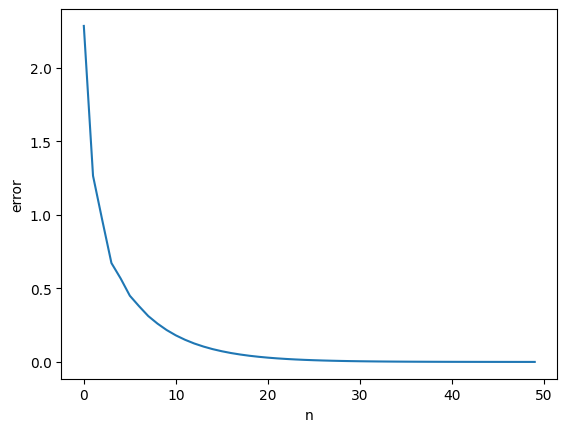

In [41]:
#TEST
A = np.asmatrix([[-2, -2, 4],
                 [-4,  1, 2],
                 [ 2,  2, 5]])
eigval = 6
x0 = np.asmatrix([[1, 2, 3]]).transpose()
n = range(50)

errors = []
for i in n:
    x1 = rayleigh(A, x0, eigval, i)
    errors.append(np.linalg.norm(A*x1 - eigval*x1)) #A*x = eigval*x
plot_errors(n, errors)